# Assignment 4 - Support Vector Machines

# Problem Statement

The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and
Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using SVM to predict
whether a student will get admission or not. 
A.Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if necessary.
B.Perform data-preparation (Train-Test Split)
C. Apply Machine Learning Algorithm
D. Evaluate Model.


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 

# Read dataset

In [2]:
ad = pd.read_csv(r'C:\Users\saura\Downloads\Admission_Predict.csv')

In [3]:
ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Remove column from dataset

ad.drop('Serial No.' , axis = 1 , inplace = True)

# Analyze dataset

ad.info()

In [4]:
ad.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Visualize Dataset

In [5]:
admission_correlation = ad.corr()

<AxesSubplot: >

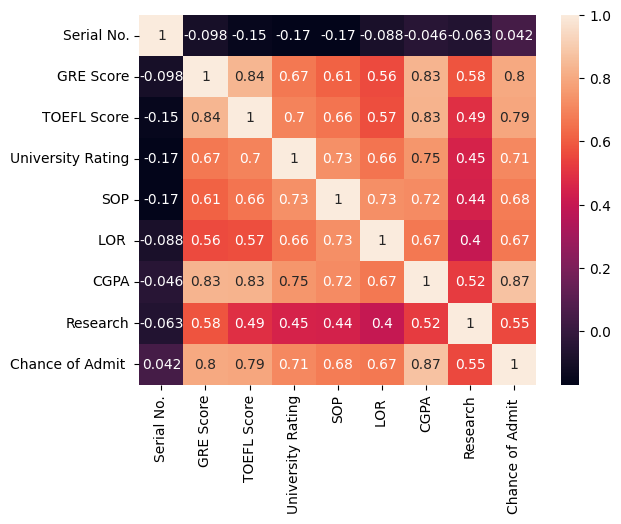

In [6]:
sns.heatmap(admission_correlation , annot = True)

In [7]:
ad['Chance of Admit '] = ad['Chance of Admit '].apply(lambda x:1 if x >= 0.50 else 0)

In [8]:
ad['Chance of Admit '].value_counts()

1    367
0     33
Name: Chance of Admit , dtype: int64

In [9]:
x = ad.drop('Chance of Admit ' , axis = 1)

In [10]:
y = ad['Chance of Admit ']

# Splitting the dataset

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [12]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Chance of Admit , dtype: int64

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 8)
(80, 8)
(320,)
(80,)


# Creating Model

# Linear Kernel

In [15]:
classifier_1 = SVC(kernel='linear')
classifier_1.fit(x_train, y_train)
y1_pred = classifier_1.predict(x_test)

# Polynomial Kernel

In [16]:
classifier_2 = SVC(kernel='poly')
classifier_2.fit(x_train, y_train)
y2_pred = classifier_2.predict(x_test)

# RBF Kernel

In [17]:
classifier_3 = SVC(kernel='rbf')
classifier_3.fit(x_train, y_train)
y3_pred = classifier_3.predict(x_test)

# Sigmoid Kernel

In [18]:
classifier_4 = SVC(kernel='sigmoid')
classifier_4.fit(x_train, y_train)
y4_pred = classifier_4.predict(x_test)

# Evaluation

In [19]:
final_output = pd.DataFrame({'Acutal': y_test, 'Linear Kernel': y1_pred, 'Polynomial kernel': y2_pred, 'rbf kernel': y3_pred, 'sigmoid kernel': y4_pred})

In [20]:
final_output.head(50)

,Acutal,Linear Kernel,Polynomial kernel,rbf kernel,sigmoid kernel
209,1,1,1,1,1
280,1,1,1,1,1
33,1,1,1,1,1
210,1,1,1,1,1
93,0,1,1,1,1
84,1,1,1,1,1
329,0,0,1,1,1
94,0,0,1,1,1
266,1,1,1,1,1
126,1,1,1,1,1


In [21]:
accuracy = pd.DataFrame({'Linear Kernel': accuracy_score(y_test, y1_pred), 'Polynomial kernel': accuracy_score(y_test, y2_pred), 'rbf kernel': accuracy_score(y_test, y3_pred), 'sigmoid kernel': accuracy_score(y_test, y4_pred)}, index=[0])

In [22]:
accuracy

,Linear Kernel,Polynomial kernel,rbf kernel,sigmoid kernel
0,0.9125,0.875,0.875,0.875


In [23]:
print("Accuracy score of Linear kernel: ", accuracy_score(y_test, y1_pred))

Accuracy score of Linear kernel:  0.9125


# Visualizing Linear Model

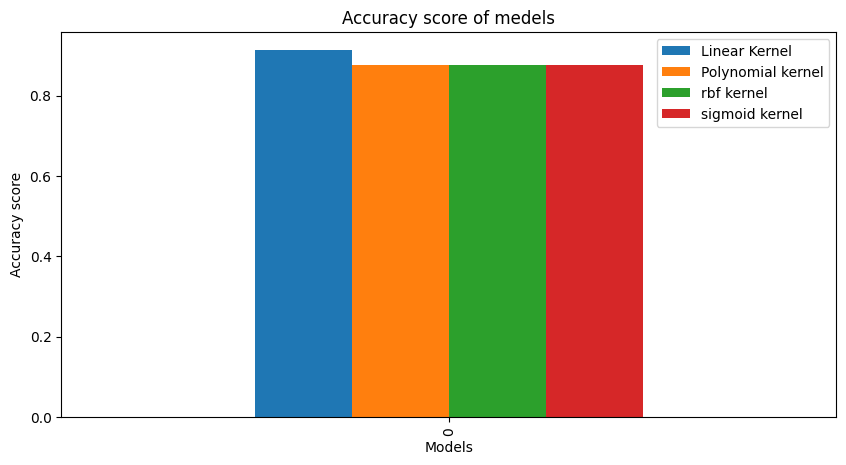

In [24]:
accuracy.plot(kind='bar', figsize=(10, 5))
plt.title('Accuracy score of medels')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.show()


<AxesSubplot: >

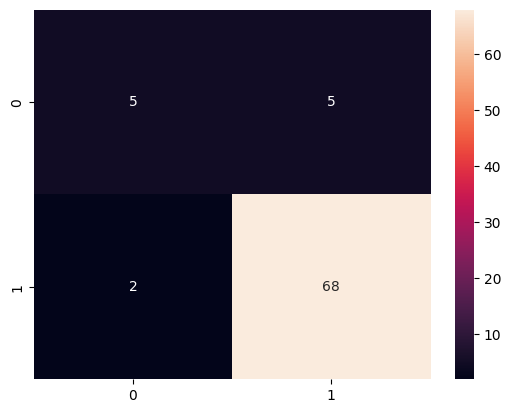

In [25]:
confusion = confusion_matrix(y_test, y1_pred)
sns.heatmap(confusion, annot=True)